# Evaluierung

## Korrelation

In [69]:
date = "28112021"
import SleepAnalysisDSP as sa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as skm
%config InlineBackend.figure_format = 'svg'
df_sensor = pd.read_csv("Sensordata/clean/" + date + "_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/" + date + "_withings_data")
sensor_cut_start = 0
sensor_cut_end = -1
offset = 1
# Sleep stage offset
ss_offset = offset + 24
hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
hr_s_norm = hr_sensor[sensor_cut_start:sensor_cut_end] - np.median(hr_sensor[sensor_cut_start:sensor_cut_end])
hr_w_norm = hr_withings[offset:len(hr_s_norm)+offset] - np.median(hr_withings[offset:len(hr_s_norm)+offset])
hr_s_clipped = hr_sensor[sensor_cut_start:sensor_cut_end]
hr_w_clipped = hr_withings[offset:len(hr_s_clipped)+offset]
hr_cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(hr_cross_corr)/2), int(-len(hr_cross_corr)/2)+int(len(hr_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_hr = hr_cross_corr.index(max(hr_cross_corr))-int(len(hr_cross_corr)/2)
rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
rr_s_norm = rr_sensor[sensor_cut_start:sensor_cut_end] - np.median(rr_sensor[sensor_cut_start:sensor_cut_end])
rr_w_norm = rr_withings[offset:len(rr_s_norm)+offset] - np.median(rr_withings[offset:len(rr_s_norm)+offset])
rr_s_clipped = rr_sensor[sensor_cut_start:sensor_cut_end]
rr_w_clipped = rr_withings[offset:len(rr_s_clipped)+offset]
rr_cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(rr_cross_corr)/2), int(-len(rr_cross_corr)/2)+int(len(rr_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_rr = rr_cross_corr.index(max(rr_cross_corr))-int(len(rr_cross_corr)/2)
ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
ss_s_norm = ss_sensor[sensor_cut_start:sensor_cut_end] - np.median(ss_sensor[sensor_cut_start:sensor_cut_end])
ss_w_norm = ss_withings[ss_offset:len(ss_s_norm)+ss_offset] - np.median(ss_withings[ss_offset:len(ss_s_norm)+ss_offset])
ss_s_clipped = ss_sensor[sensor_cut_start:sensor_cut_end]
ss_w_clipped = ss_withings[ss_offset:len(ss_s_clipped)+ss_offset]
ss_cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(ss_cross_corr)/2), int(-len(ss_cross_corr)/2)+int(len(ss_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_ss = ss_cross_corr.index(max(ss_cross_corr))-int(len(ss_cross_corr)/2)

print(f"Heart Rate Accuracy: {skm.accuracy_score(hr_w_norm, hr_s_norm):.2f}")
print(f"Heart Rate Precision: {skm.precision_score(hr_w_norm, hr_s_norm, average='macro', zero_division=1):.2f}")
print(f"Heart Rate F1-Score: {skm.f1_score(hr_w_norm, hr_s_norm, average='weighted'):.2f}")
print(f"Respiratory Rate Accuracy: {skm.accuracy_score(rr_w_norm, rr_s_norm):.2f}")
print(f"Respiratory Rate Precision: {skm.precision_score(rr_w_norm, rr_s_norm, average='macro', zero_division=1):.2f}")
print(f"Respiratory Rate F1-Score: {skm.f1_score(rr_w_norm, rr_s_norm, average='weighted'):.2f}")
print(f"Sleep Phase Accuracy: {skm.accuracy_score(ss_w_clipped, ss_s_clipped):.2f}")
print(f"Sleep Phase Precision: {skm.precision_score(ss_w_clipped, ss_s_clipped, average='macro', zero_division=1):.2f}")
print(f"Sleep Phase F1-Score: {skm.f1_score(ss_w_clipped, ss_s_clipped, average='weighted'):.2f}\n")
print("hr_s:",np.median(hr_s_clipped),"hr_w:",np.median(hr_w_clipped))
print("rr_s:",np.median(rr_s_clipped),"rr_w:",np.median(rr_w_clipped))
print("deep_s:",ss_s_clipped.count(1),"deep_w:",ss_w_clipped.count(1))
print("light_s:",ss_s_clipped.count(2),"light_w:",ss_w_clipped.count(2))
print("rem_s:",ss_s_clipped.count(3),"rem_w:",ss_w_clipped.count(3))
print("awake_s:",ss_s_clipped.count(4),"awake_w:",ss_w_clipped.count(4))
print("duration_s:",len(ss_s_clipped),"duration_w:",len(ss_s_clipped))



Heart Rate Accuracy: 0.14
Heart Rate Precision: 0.08
Heart Rate F1-Score: 0.16
Respiratory Rate Accuracy: 0.40
Respiratory Rate Precision: 0.37
Respiratory Rate F1-Score: 0.41
Sleep Phase Accuracy: 0.46
Sleep Phase Precision: 0.37
Sleep Phase F1-Score: 0.45

hr_s: 60.0 hr_w: 60.0
rr_s: 17.0 rr_w: 14.0
deep_s: 66 deep_w: 82
light_s: 246 light_w: 209
rem_s: 91 rem_w: 118
awake_s: 8 awake_w: 2
duration_s: 411 duration_w: 411


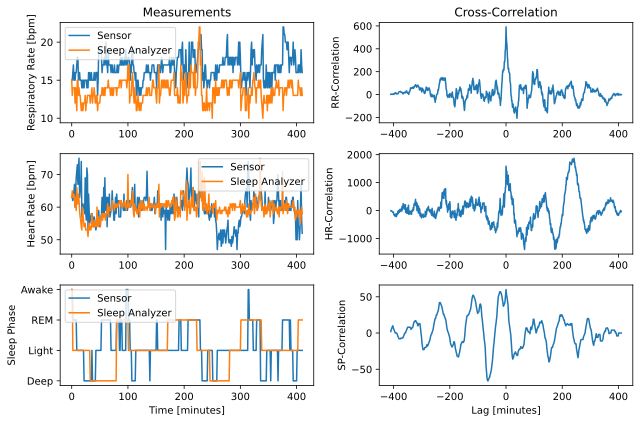

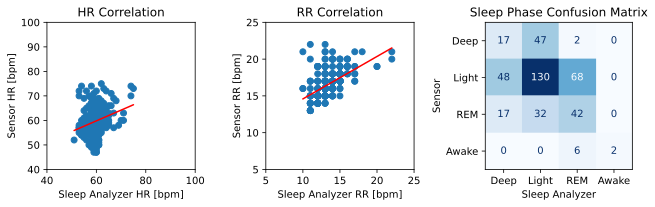

In [70]:
plt.style.use('default')
plt.figure(figsize=(9,6))
plt.subplot(321, title="Measurements", ylabel="Respiratory Rate [bpm]")
plt.plot(rr_s_clipped, label="Sensor")
plt.plot(rr_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.subplot(322, title="Cross-Correlation", ylabel="RR-Correlation")
plt.plot(x_vals, rr_cross_corr)
plt.subplot(323, ylabel="Heart Rate [bpm]")
plt.plot(hr_s_clipped, label="Sensor")
plt.plot(hr_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.subplot(324, ylabel="HR-Correlation")
plt.plot(x_vals, hr_cross_corr)
plt.subplot(325, xlabel="Time [minutes]", ylabel="Sleep Phase")
plt.plot(ss_s_clipped, label="Sensor")
plt.plot(ss_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.yticks([1,2,3,4],["Deep","Light","REM","Awake"])
plt.subplot(326,xlabel="Lag [minutes]", ylabel="SP-Correlation")
plt.plot(x_vals, ss_cross_corr)
plt.tight_layout()
plt.show
fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].scatter(hr_w_clipped, hr_s_clipped)
ax[0].set_xlim([40, 100])
ax[0].set_ylim([40, 100])
z = np.polyfit(hr_w_clipped, hr_s_clipped, 1)
p = np.poly1d(z)
ax[0].plot(hr_w_clipped,p(hr_w_clipped),"r")
ax[0].set_xlabel("Sleep Analyzer HR [bpm]")
ax[0].set_ylabel("Sensor HR [bpm]")
ax[0].set_title("HR Correlation")
ax[1].scatter(rr_w_clipped, rr_s_clipped)
ax[1].set_ylim([5, 25])
ax[1].set_xlim([5, 25])
z = np.polyfit(rr_w_clipped, rr_s_clipped, 1)
p = np.poly1d(z)
ax[1].plot(rr_w_clipped,p(rr_w_clipped),"r")
ax[1].set_xlabel("Sleep Analyzer RR [bpm]")
ax[1].set_ylabel("Sensor RR [bpm]")
ax[1].set_title("RR Correlation")
ConfusionMatrixDisplay.from_predictions(ss_s_clipped, ss_w_clipped, display_labels=["Deep","Light","REM","Awake"], cmap="Blues", ax=ax[2], colorbar=False)
ax[2].set_title("Sleep Phase Confusion Matrix")
ax[2].set_xlabel("Sleep Analyzer")
ax[2].set_ylabel("Sensor")
plt.tight_layout()
plt.show()

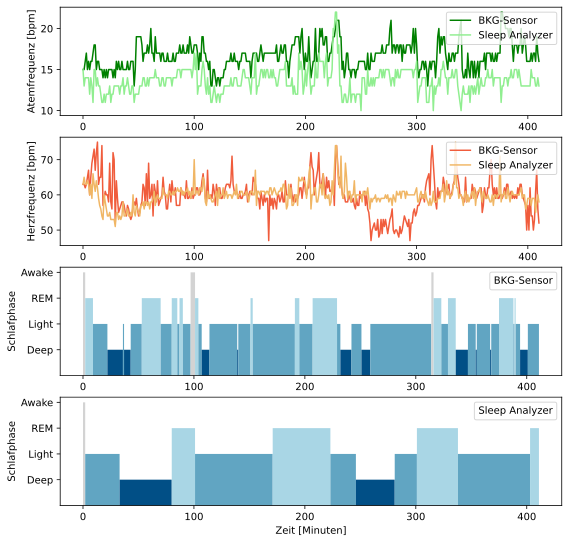

In [76]:
# set colors for sleep phases
ss_s_seq, ss_s_lengths, ss_s_tick_x_pos = sa.group_list(ss_s_clipped)
cc_s = []
for val in ss_s_seq:
    if val == 1:
        cc_s.append("#014f86")
    elif val == 2:
        cc_s.append("#61a5c2")
    elif val == 3:
        cc_s.append("#a9d6e5")
    else:
        cc_s.append("lightgrey")
ss_w_seq, ss_w_lengths, ss_w_tick_x_pos = sa.group_list(ss_w_clipped)
cc_w = []
for val in ss_w_seq:
    if val == 1:
        cc_w.append("#014f86")
    elif val == 2:
        cc_w.append("#61a5c2")
    elif val == 3:
        cc_w.append("#a9d6e5")
    else:
        cc_w.append("lightgrey")
plt.style.use('default')
plt.figure(figsize=(9,9))
plt.subplot(411, ylabel="Atemfrequenz [bpm]")
plt.plot(rr_s_clipped, label="BKG-Sensor", color="green")
plt.plot(rr_w_clipped, label="Sleep Analyzer", color="lightgreen")
plt.legend(loc="upper right", )
plt.subplot(412, ylabel="Herzfrequenz [bpm]")
plt.plot(hr_s_clipped, label="BKG-Sensor", color="#F05C3C")
plt.plot(hr_w_clipped, label="Sleep Analyzer", color="#f0b665")
plt.legend(loc="upper right", )
plt.subplot(413, ylabel="Schlafphase")
plt.bar(ss_s_tick_x_pos, ss_s_seq, label="BKG-Sensor", color=cc_s, edgecolor="none", width=ss_s_lengths)
plt.legend(loc="upper right", handlelength=0, handletextpad=0, fancybox=True)
plt.yticks([1,2,3,4],["Deep","Light","REM","Awake"])
plt.subplot(414, xlabel="Zeit [Minuten]", ylabel="Schlafphase")
plt.bar(ss_w_tick_x_pos, ss_w_seq, label="Sleep Analyzer", color=cc_w, edgecolor="none", width=ss_w_lengths)
plt.legend(loc="upper right", handlelength=0, handletextpad=0, fancybox=True)
plt.yticks([1,2,3,4],["Deep","Light","REM","Awake"])
plt.show()

19.209372712298546


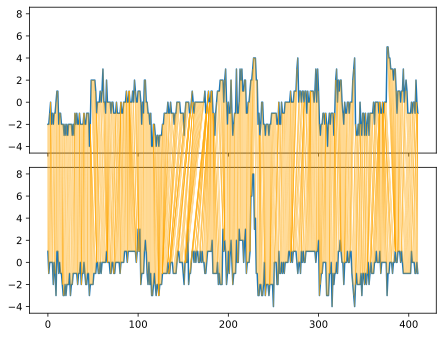

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(rr_s_norm, rr_w_norm)
dtwvis.plot_warping(rr_s_norm, rr_w_norm, path=path)
distance = dtw.distance(rr_s_norm, rr_w_norm)
print(distance)
plt.show()

59.06775770248944


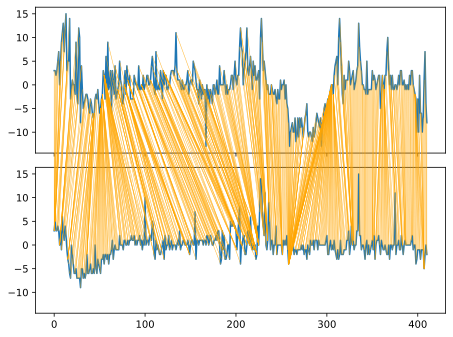

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(hr_s_norm, hr_w_norm)
dtwvis.plot_warping(hr_s_norm, hr_w_norm, path=path)
distance = dtw.distance(hr_s_norm, hr_w_norm)
print(distance)
plt.show()

10.63014581273465


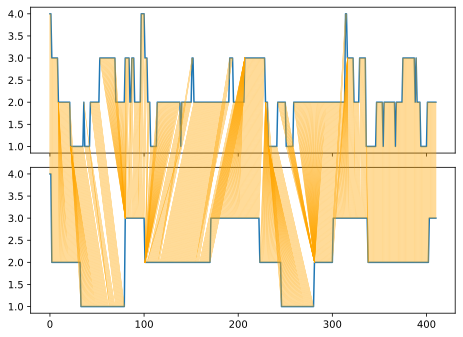

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(ss_s_clipped, ss_w_clipped)
dtwvis.plot_warping(ss_s_clipped, ss_w_clipped, path=path)
distance = dtw.distance(ss_s_clipped, ss_w_clipped)
print(distance)
plt.show()